In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

In [2]:
''' reading dataset '''
df = pd.read_csv('AMZN.csv')

In [3]:
''' displaying first 5 rows '''
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [4]:
''' checking null values '''
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
''' shape of data '''
df.shape

(6257, 7)

In [6]:
''' converting Date column into datetime '''
df['Date'] = df['Date'].map(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [7]:
''' making Date as index of data '''
df.set_index('Date', inplace=True)

In [8]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [9]:
''' info of data '''
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6257 entries, 1997-05-15 to 2022-03-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6257 non-null   float64
 1   High       6257 non-null   float64
 2   Low        6257 non-null   float64
 3   Close      6257 non-null   float64
 4   Adj Close  6257 non-null   float64
 5   Volume     6257 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 342.2 KB


In [10]:
''' describe '''
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000,6.257000e+03
mean,565.005651,571.345671,558.004657,564.817334,564.817334,7.270525e+06
std,918.112233,928.035683,906.961303,917.488221,917.488221,7.108549e+06
min,1.406250,1.447917,1.312500,1.395833,1.395833,4.872000e+05
25%,39.009998,39.799999,38.360001,39.060001,39.060001,3.536500e+06
50%,105.930000,110.625000,101.500000,103.625000,103.625000,5.424200e+06
75%,596.140015,600.750000,588.299988,593.859985,593.859985,8.242900e+06
max,3744.000000,3773.080078,3696.790039,3731.409912,3731.409912,1.043292e+08


In [11]:
''' dropping some columns '''
df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], inplace=True, axis=1)
df - df[df.index > '2015-01-01']

df.head()

,Close
Date,
1997-05-15,1.958333
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635417
1997-05-21,1.427083


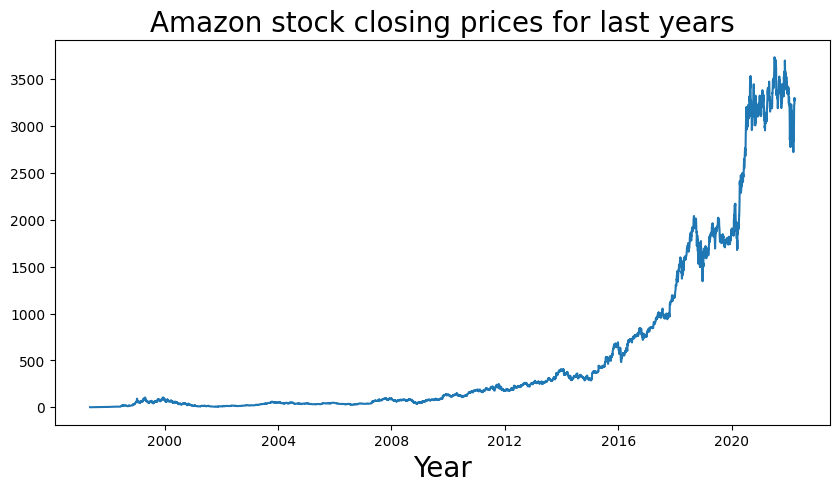

In [12]:
plt.figure(figsize=(10, 5))
plt.title('Amazon stock closing prices for last years', fontsize=20)
plt.plot(df['Close']);
plt.xlabel('Year', fontsize=20);

In [13]:
''' checking stationary of data '''
mean_2022 = df[(df.index >= '2022-01-01') & (df.index < '2022-03-31')].mean()
var_2022  = df[(df.index >= '2022-01-01') & (df.index < '2022-03-31')].var()

mean_2019 = df[(df.index >= '2019-10-01') & (df.index < '2019-12-31')].mean()
var_2019  = df[(df.index >= '2019-10-01') & (df.index < '2019-12-31')].var()

mean_2017 = df[(df.index >= '2017-01-01') & (df.index < '2017-03-31')].mean()
var_2017  = df[(df.index >= '2017-01-01') & (df.index < '2017-03-31')].var()

print('2022 closing price mean: {}'.format(round(mean_2022, 2)))
print('2022 closing price variance: {}'.format(round(var_2022, 2)))
print("-" * 100)
print()

print('2019 closing price mean: {}'.format(round(mean_2019, 2)))
print('2019 Qclosing price variance : {}'.format(round(var_2019, 2)))
print("-" * 100)
print()

print('2017 closing price mean: {}'.format(round(mean_2017, 2)))
print('2017 closing price variance: {}'.format(round(var_2017, 2)))

2022 closing price mean: Close    3069.33
dtype: float64
2022 closing price variance: Close    31046.17
dtype: float64
----------------------------------------------------------------------------------------------------

2019 closing price mean: Close    1768.93
dtype: float64
2019 Qclosing price variance : Close    1054.58
dtype: float64
----------------------------------------------------------------------------------------------------

2017 closing price mean: Close    832.63
dtype: float64
2017 closing price variance: Close    630.34
dtype: float64


<Figure size 1000x500 with 0 Axes>

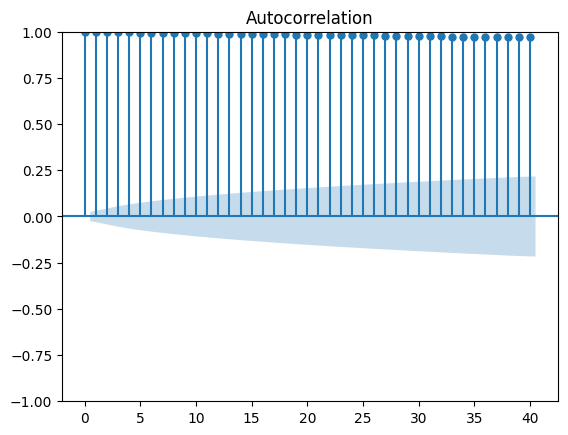

In [14]:
''' Plot the correlation function  '''
plt.figure(figsize=(10, 5));
plot_acf(df, lags=40);
plt.show()

In [15]:
''' converting series into stationary series '''
df_diff = df.diff(periods=1)
df_diff = df_diff.dropna()
df_diff.head()

,Close
Date,
1997-05-16,-0.229166
1997-05-19,-0.020834
1997-05-20,-0.072916
1997-05-21,-0.208334
1997-05-22,-0.031250


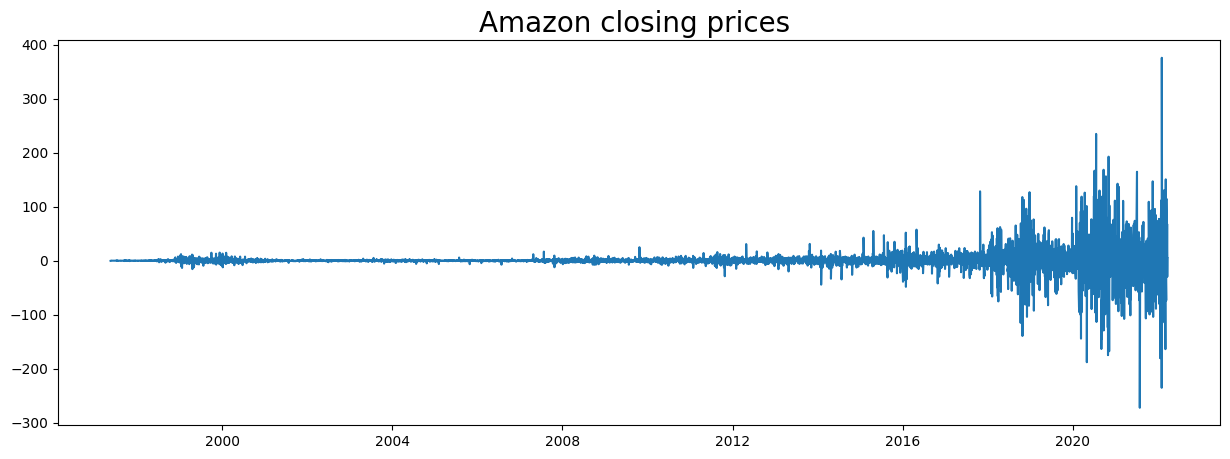

In [16]:
plt.figure(figsize=(15,5))
plt.title("Amazon closing prices ",fontsize=20)
plt.plot(df_diff);

<Figure size 1000x1000 with 0 Axes>

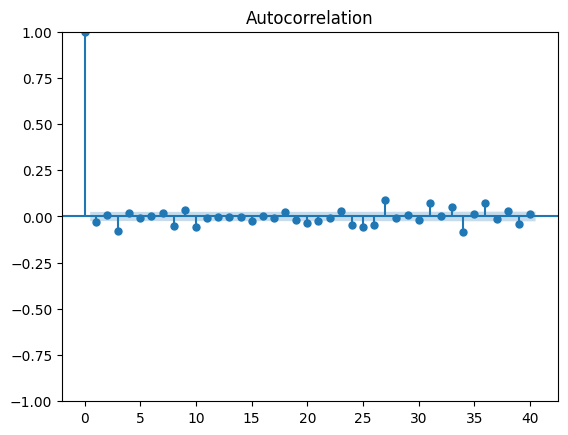

In [17]:
''' Plot the autocorrelation function. The ACF value decreases to zero quickly for stationary series '''
plt.figure(figsize=(10, 10))
plot_acf(df_diff, lags=40)
plt.show()

In [18]:
''' Autoregression Model '''
X = df.values
size = int(len(df) * 0.70)

X_train = df[:size]
X_test = df[size:]

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (4379, 1)
X_test shape:  (1878, 1)


In [19]:
''' Model'''
model = AutoReg(X_train, lags= 30)
model = model.fit()

print("Lags: ", model.ar_lags)
print("Coefficients: ", model.params)

Lags:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
Coefficients:  const        0.069486
Close.L1     0.976214
Close.L2    -0.021907
Close.L3     0.046184
Close.L4    -0.041045
Close.L5     0.046774
Close.L6    -0.021686
Close.L7     0.036725
Close.L8    -0.018776
Close.L9    -0.053800
Close.L10    0.050548
Close.L11    0.007825
Close.L12   -0.037613
Close.L13    0.034767
Close.L14   -0.018672
Close.L15   -0.023374
Close.L16    0.057571
Close.L17   -0.008541
Close.L18   -0.024235
Close.L19    0.007554
Close.L20    0.007781
Close.L21   -0.028323
Close.L22   -0.011497
Close.L23    0.057589
Close.L24   -0.024237
Close.L25    0.050804
Close.L26   -0.058619
Close.L27   -0.002717
Close.L28    0.006952
Close.L29    0.005469
Close.L30    0.002521
dtype: float64


/home/mohamed/Desktop/Projects/Mini-Projects-Python/Machine Learning/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


/home/mohamed/Desktop/Projects/Mini-Projects-Python/Machine Learning/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/mohamed/Desktop/Projects/Mini-Projects-Python/Machine Learning/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/mohamed/Desktop/Projects/Mini-Projects-Python/Machine Learning/.venv/lib/python3.10/site-packages/statsmodels/tsa/deterministic.py:307: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._

MSE:  2391920.4341156613
----------------------------------------------------------------------------------------------------



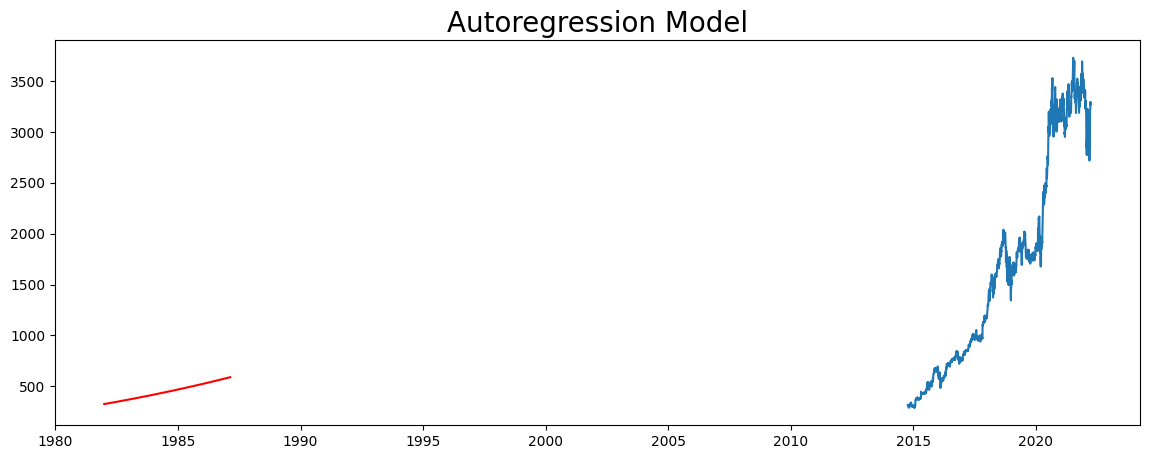

In [20]:
''' prediction '''
y_pred = model.predict(start=len(X_train), end=len(X_train)+len(X_test)-1, dynamic=False)

print("MSE: ", mean_squared_error(X_test, y_pred))
print("-" * 100)
print()

plt.figure(figsize=(14,5))
plt.title("Autoregression Model", fontsize=20)
plt.plot(X_test)
plt.plot(y_pred, color='r')